<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Fantasy%20Draft%20Strategy/FantasyNFL_Capstone_Preprocessing_(FINAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1: Fantasy NFL (Preprocessing)

The next step for my Capstone project is to clean up and prepare the dataset so it is ready for the Modelling stage of the project.

## Getting Started

### Import packages & load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NFL_FantasyData_2015_2019_EDA_v3.csv')
#df.head()

Dataset has unamed column 'Unnamed: 0' from import that is not of value and should be removed.

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
#df.head()

In [5]:
df.shape

(22410, 47)

## Review Dataset

Next, we will look see what data types are in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22410 entries, 0 to 22409
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM             22410 non-null  object 
 1   OPP              22410 non-null  object 
 2   DATE             22410 non-null  object 
 3   SEASON           22410 non-null  int64  
 4   WEEK             22410 non-null  object 
 5   MONTH            22410 non-null  object 
 6   TIME             22410 non-null  object 
 7   POS              22410 non-null  object 
 8   PLAYER           22410 non-null  object 
 9   FAN_ACTUAL       22410 non-null  float64
 10  HOME             22410 non-null  int64  
 11  DOME             22410 non-null  int64  
 12  GRASS            22410 non-null  int64  
 13  SUNDAY           22410 non-null  int64  
 14  WEEK_SEASON_ID   22410 non-null  int64  
 15  FAN_AVG          22410 non-null  float64
 16  PASSCOMP_AVG     22410 non-null  float64
 17  PASSATT_AVG 

There are 8 objects or categorical variables that we will need to make numeric.

### Categorical variables

The review of the object columns below shows that including them all (as dummy variables) would create +1,300 new columns.

Initially we will focus on the POS, TEAM, OPP, and PLAYER columns. Following this, we will review the time/date columns of DATE, WEEK, MONTH, DAY, TIME.

In [7]:
object_cols = list(df.columns[df.dtypes == np.object])

In [8]:
for x in object_cols:
  val = df[x].nunique()
  print(x,' = ', val)

TEAM  =  32
OPP  =  32
DATE  =  248
WEEK  =  17
MONTH  =  5
TIME  =  3
POS  =  4
PLAYER  =  1012


#### Remove 'PLAYER' column

First, I will remove the PLAYER field. Turning this to dummy values would create 1,011 additional columns which would add too many dimensions to the problem. It is also unlikely that the player's name itself will be a main indicator of performance, but rather the statistics that they produce.

In [9]:
df = df.drop(columns='PLAYER')

In [10]:
#df.shape

#### Remove 'TEAM' and 'OPP' column

Transforming the TEAM and OPP columns into dummy variables would add 31 columns each. We also noted during our EDA that, although the Team and Coach columns were providing us with information, that this information could be proxied using team peformance statisitcs (i.e. it likely isn't the name of the team that influences a player performance but rather the team performance under a certain organisation structure that influences it).

With this in mind, I have decided to remove both the 'TEAM' and 'OPP' column. However, based on the performance of our initial modelling we could look to reintroduce if required.

In [11]:
df = df.drop(columns=['TEAM', 'OPP'])

In [12]:
#df.shape

#### Create dummy variables for 'POS' column

Throughout the EDA, we saw that position of a player was an important indicator of fantasy performance and therefore we will include it in our model. To do this, we will create dummy variables below.

In [13]:
dummy_POS = pd.get_dummies(df.POS, prefix='POS', drop_first=True)

In [14]:
df = pd.concat([df, dummy_POS], axis=1).drop(columns=['POS'])

In [15]:
df.head()
df.shape

(22410, 46)

### Date variables

#### Date

Our data has 248 unique values in our 'DATE' column. While we want to capture some time element in our model, I don't believe it needs to be as granular as a specific date. For this reason, we will remove the date field from our data set for now but can look to include again if we believe the time is becoming an issue with our data.

In [16]:
df = df.drop(columns=['DATE'])

In [17]:
df.shape

(22410, 45)

#### Week, Month & Season

As mentioned when removing the 'DATE' column, we have other variables in our dataset that we believe can capture the time and date aspect of data. This namely relates to the following columns:

* 'WEEK' - what gamewek was a game played in (there are 17 gameweeks in an NFL season)
* 'MONTH' - what month was a game played in
* 'SEASON' - what season was a game played in
* 'WEEK_SEASON_ID' - what number in order did a game get played in since start of this dataset
* 'SUNDAY' - was game played on a Sunday (1 if yes, 0 if no)
* 'TIME' - what time was game played (Noon, Afternoon, Night)


For this, there are two main decisions that need to be answered in order:

1.  Do we want to include 'WEEK_SEASON_ID'?
  * This is an ordered numeric series that may cause issues with our model if not correctly applied. For this reason, it is probably best to __remove 'WEEK_SEASON_ID'.__

2.  Do we want to keep 'WEEK' or 'MONTH' column?
  * During our EDA, we found that both showed a trend that as the season went on the lower average fantasy points became. However, including both will likely create a duplication of information so it is probably best to proceed with only one for our modelling. __As 'MONTH' required fewer variables, we will begin with this but can return to include 'WEEK' if required later.__


This means that we will proceed with the 'MONTH', 'SEASON', 'TIME', and 'SUNDAY' columns to capture the time elements of the data in our modelling. To do this, we will need to create dummy variable for all the columns (for 'SEASON' we will first have to turn into an object), except for 'SUNDAY' which is already created as a boolean/binary column.

In [18]:
df = df.drop(columns=['WEEK_SEASON_ID', 'WEEK'])

In [19]:
df.shape

(22410, 43)

In [20]:
df['SEASON'] = df['SEASON'].astype(object)

In [21]:
dummy_SEASON = pd.get_dummies(df.SEASON, prefix='SEASON', drop_first=True)
dummy_MONTH = pd.get_dummies(df.MONTH, prefix='MONTH', drop_first=True)
dummy_TIME = pd.get_dummies(df.TIME, prefix='TIME', drop_first=True)

In [22]:
df = pd.concat([df, dummy_SEASON, dummy_MONTH, dummy_TIME], axis=1).drop(columns=['SEASON', 'MONTH', 'TIME'])

In [23]:
df.head()
df.shape

(22410, 50)

## Training and Test Data

Next we will split our data between a training and testing sets. This will allow us to build our model on the training set and then evaluate it on the test set. The aim of this is to avoid us overfitting our model and allowing to generalise to new data when it becomes available – like a new season.  

To do this, I will import the train_test_split fuction from sklearn.

In [24]:
from sklearn.model_selection import train_test_split

Now, we will need breakout the data into our target and feature variables. 

For our model, we have two potential target variables  - 'FAN_ACTUAL' or 'cluster_4'.  'FAN_ACTUAL' is a a continuous variable and 'cluster_4' is a categorical variable meaning the choice between which variable we use will dicate what type of model - regression or classification.

To date, most of our focus has been on understanding the relationship with Fantasy Points so we will continue with this for now and use 'FAN_ACTUAL' as our target variable (y). However, depending on results, future analysis could look to incorporate cluster into a classification problem / model.

The remaining 48 columns will become our features (X) for modelling.

In [25]:
X = df.drop(['FAN_ACTUAL', 'cluster_4'], axis=1)
y = df['FAN_ACTUAL']

Finally, we will split the data into training and test data. For this we will use the default test size of 25%.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Scaling

Our data contains a wide variety of values and scales that will need to standardized before we model our data. As the table below shows, values differs between each column. For example, 'PASSYDS_AVG' has a range between 0 and 403, where as 'FUMLST_AVG' ranges between 0 and 2. As well as this, we have a number of dummy variables generated earlier to represent if a category is present or not. These variables do not need to be standardise.

Based on this variety of data, we look at 3 steps to standardise our dataset:
1. Remove Dummy Variables from X_train and X_test
2. Standarise continuous variables in X_train and X_test
3. Concatenate Dummy variables back into scaled X_train and X_test data


In [27]:
X_train.describe()

,HOME,DOME,GRASS,SUNDAY,FAN_AVG,PASSCOMP_AVG,PASSATT_AVG,PASSCOMP%_AVG,PASSYDS_AVG,PASSTD_AVG,INT_AVG,QBRAT_AVG,SACK_AVG,SACKYDS_AVG,PASSYDS_300_AVG,PASSYDS_400_AVG,RUSHATT_AVG,RUSHYDS_AVG,RUSHTD_AVG,FUM_AVG,FUMLST_AVG,RUSHYDS_100_AVG,RUSHYDS_200_AVG,TGTS_AVG,REC_AVG,RECYDS_AVG,RECTD_AVG,RECYDS_100_AVG,RECYDS_200_AVG,PTS_FOR_AVG,PTS_AGT_AVG,WIN/TIE_AVG,OPP_PTS_FOR_AVG,OPP_PTS_AGT_AVG,OPP_WIN/TIE_AVG,POS_RB,POS_TE,POS_WR,SEASON_2016,SEASON_2017,SEASON_2018,SEASON_2019,MONTH_January,MONTH_November,MONTH_October,MONTH_September,TIME_Night,TIME_Noon
count,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000
mean,0.493723,0.255608,0.557803,0.849051,7.546625,2.473716,3.896794,0.079652,28.200462,0.177897,0.091103,11.391458,0.262197,1.738224,0.054164,0.003099,2.898366,12.284876,0.088748,0.118145,0.056331,0.042562,0.000476,3.633179,2.438523,27.865934,0.174228,0.083269,0.000823,22.765038,22.712883,0.503783,22.662398,22.717618,0.501998,0.298090,0.183554,0.389659,0.201166,0.206759,0.201583,0.202713,0.024514,0.239960,0.254537,0.192955,0.197061,0.550604
std,0.499975,0.436215,0.496662,0.358010,6.164507,6.901203,10.794579,0.208256,78.965386,0.540575,0.298330,29.995078,0.790203,5.347899,0.223866,0.030503,4.947764,22.091557,0.218702,0.240575,0.139145,0.184272,0.011561,2.913949,1.909205,25.511847,0.261646,0.245935,0.014379,5.968966,5.445327,0.286630,5.943260,5.467609,0.287166,0.457433,0.387132,0.487687,0.400884,0.404993,0.401194,0.402033,0.154642,0.427071,0.435613,0.394630,0.397790,0.497447
min,0.000000,0.000000,0.000000,0.000000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,1.000000,7.500000,0.000000,0.000000,0.000000,18.750000,19.000000,0.250000,18.500000,19.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,5.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000,2.250000,21.750000,0.000000,0.000000,0.000000,22.500000,22.500000,0.500000,22.250000,22.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,14.750000,0.000000,0.250000,0.000000,0.000000,0.000000,5.500000,3.500000,41.875000,0.250000,0.000000,0.000000,26.750000,26.500000,0.750000,26.500000,26.250000,0.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,44.090000,36.000000,52.250000,1.000000,403.000000,5.000000,3.000000,158.300000,7.000000,54.000000,2.000000,1.000000,29.500000,155

### Split out Dummy Variables

In [28]:
dummy_list = ['HOME', 'DOME', 'GRASS', 'SUNDAY', 'POS_RB', 'POS_TE', 'POS_WR', 'SEASON_2016', 'SEASON_2017', 'SEASON_2018', 'SEASON_2019', 'MONTH_January', 'MONTH_November', 'MONTH_October', 'MONTH_September', 'TIME_Night', 'TIME_Noon']

In [29]:
X_train_dummy = X_train[dummy_list]
X_test_dummy = X_test[dummy_list]

In [30]:
X_train = X_train.drop(columns=dummy_list)
X_test = X_test.drop(columns=dummy_list)

### Scale Continuous Variables

To standardise our continuous variables, we will use the StandarScaler() method from sklearn.preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
#X_train_scaled.head()

In [34]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))
#X_test_scaled.head()

### Merge together Scaled and Dummy Datasets

In [35]:
print(X_train_scaled.shape)
print(X_train_dummy.shape)
print(X_test_scaled.shape)
print(X_test_dummy.shape)

(16807, 31)
(16807, 17)
(5603, 31)
(5603, 17)


In [36]:
X_train = pd.concat([X_train_scaled, X_train_dummy.reset_index().drop(columns='index')], axis=1)
X_test = pd.concat([X_test_scaled, X_test_dummy.reset_index().drop(columns='index')], axis=1)

In [37]:
#X_train.describe()
#X_test.describe()

In [38]:
print(X_train.shape)
print(X_test.shape)

(16807, 48)
(5603, 48)


## Feature Elimination

We still have 48 columns remaining in our X_train and X_test data to use as explanatory features for our model. This is still quite high and we would like to reduce the number of feature if possible. There are a couple of ways of doing this 


1. Remove Low Variance Features
2. Remove Highly Correlated Features
3. Recursive Feature Elimination

In the below sections, we will look at these various different approaches before deciding on best one for final feature selection.

Finally, I would like to mention a couple of methods that were considered but not included in final version:
* **Univariate Feature Selection:** Univariate feature selection works by selecting the best features based on univariate statistical tests. However, having applied the low variance threshold technique initially and finding little issue here, I decided that univariate approach was unlikely needed. 
* **Meta-transform Feature Elimination:** SelectFromModel from sklearn could be used along with any estimator that states importance of each feature and remove unimportant features below a certain threshold parameter. However, given our use of the Rescursive Feature Elimination method, there was no need for this model in this instance. 
* **Principal Component Analysis:** During our EDA, we looked at PCA as way to visualise our clustering but could also be used here for dimension reduction. However, applying this apporach removes column names and make the results more difficult to interpret. For this reason, I would prefer not go with this option for now.


### Low Variance Feature Elimination

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. 

Below we have applied a threshold of 0.1, which means we are looking for columns where approximately 90% of the values are similar.

When we apply this, one column is removed - 'MONTH_January'.

In [39]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0.1)
var_thres.fit(X_train)

X_train_varthres = var_thres.transform(X_train)
X_train_varthres.shape

(16807, 47)

In [40]:
cols = var_thres.get_support(indices=True)

X_varthres_train = X_train.iloc[:,cols]
X_varthres_test = X_test.iloc[:,cols]

X_varthres_train.head()
X_varthres_test.head()

,FAN_AVG,PASSCOMP_AVG,PASSATT_AVG,PASSCOMP%_AVG,PASSYDS_AVG,PASSTD_AVG,INT_AVG,QBRAT_AVG,SACK_AVG,SACKYDS_AVG,PASSYDS_300_AVG,PASSYDS_400_AVG,RUSHATT_AVG,RUSHYDS_AVG,RUSHTD_AVG,FUM_AVG,FUMLST_AVG,RUSHYDS_100_AVG,RUSHYDS_200_AVG,TGTS_AVG,REC_AVG,RECYDS_AVG,RECTD_AVG,RECYDS_100_AVG,RECYDS_200_AVG,PTS_FOR_AVG,PTS_AGT_AVG,WIN/TIE_AVG,OPP_PTS_FOR_AVG,OPP_PTS_AGT_AVG,OPP_WIN/TIE_AVG,HOME,DOME,GRASS,SUNDAY,POS_RB,POS_TE,POS_WR,SEASON_2016,SEASON_2017,SEASON_2018,SEASON_2019,MONTH_November,MONTH_October,MONTH_September,TIME_Night,TIME_Noon
0,0.357440,-0.358458,-0.361006,-0.382481,-0.357135,-0.329099,-0.305386,-0.379789,-0.331820,-0.325039,-0.241955,-0.101595,-0.535281,-0.476888,-0.405805,-0.491110,-0.404848,-0.230979,-0.041174,0.297482,0.555995,0.897024,2.200639,-0.338591,-0.057243,-0.630788,0.374115,-1.757661,0.687792,1.423404,-0.877560,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
1,-0.198177,-0.213551,-0.245204,1.418242,-0.246324,-0.329099,0.532639,0.673749,-0.331820,-0.325039,-0.241955,-0.101595,1.182718,0.202125,0.737337,0.548099,1.391899,-0.230979,-0.041174,1.498637,2.258325,0.397242,-0.665911,-0.338591,-0.057243,0.123134,-1.095078,1.731263,-0.490048,0.371724,-0.877560,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
2,-0.555069,-0.358458,-0.361006,-0.382481,-0.357135,-0.329099,-0.305386,-0.379789,-0.331820,-0.325039,-0.241955,-0.101595,0.424777,0.292660,0.737337,-0.491110,-0.404848,-0.230979,-0.041174,-0.817876,-0.884438,-0.798317,-0.665911,-0.338591,-0.057243,0.709518,0.511852,-0.013199,0.519529,-0.588505,-0.006958,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
3,-0.895739,-0.358458,-0.361006,-0.382481,-0.357135,-0.329099,-0.305386,-0.379789,-0.331820,-0.325039,-0.241955,-0.101595,-0.333164,0.236076,-0.405805,-0.491110,-0.404848,-0.230979,-0.041174,-0.989470,-0.884438,-0.984511,-0.665911,-0.338591,-0.057243,-1.468479,0.236378,-0.885430,0.267134,0.828976,-0.877560,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,1.069602,4.278553,3.437310,3.365365,2.821567,1.520839,3.046712,2.624127,7.261388,5.658797,-0.241955,-0.101595,1.031130,0.847187,-0.405805,-0.491110,-0.404848,-0.230979,-0.041174,-1.246860,-1.277283,-1.092307,-0.665911,-0.338591,-0.057243,1.379671,2.072870,-1.757661,1.402909,0.051648,1.734245,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0


In [41]:
print('Features remaining: ', len(X_train.columns[var_thres.get_support()]))

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print('Features removed: ', len(constant_columns))

Features remaining:  47
Features removed:  1


In [42]:
for column in constant_columns:
    print(column)

MONTH_January


In [43]:
print('Features remaining: ', len(X_test.columns[var_thres.get_support()]))

constant_columns = [column for column in X_test.columns
                    if column not in X_test.columns[var_thres.get_support()]]

print('Features removed: ', len(constant_columns))

Features remaining:  47
Features removed:  1


In [44]:
for column in constant_columns:
    print(column)

MONTH_January


In [45]:
X_train = X_varthres_train
X_test = X_varthres_test

### Covariance Feature Selection

Next we will check the dataset to see if it contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.

Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/ 

Below we look to identify which variables have a correlation (or pearson coefficient) greater than 0.8 and look to drop these columns. This reduces the dataset by 11 features to 36.

In [46]:
#X_train.head()

In [47]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

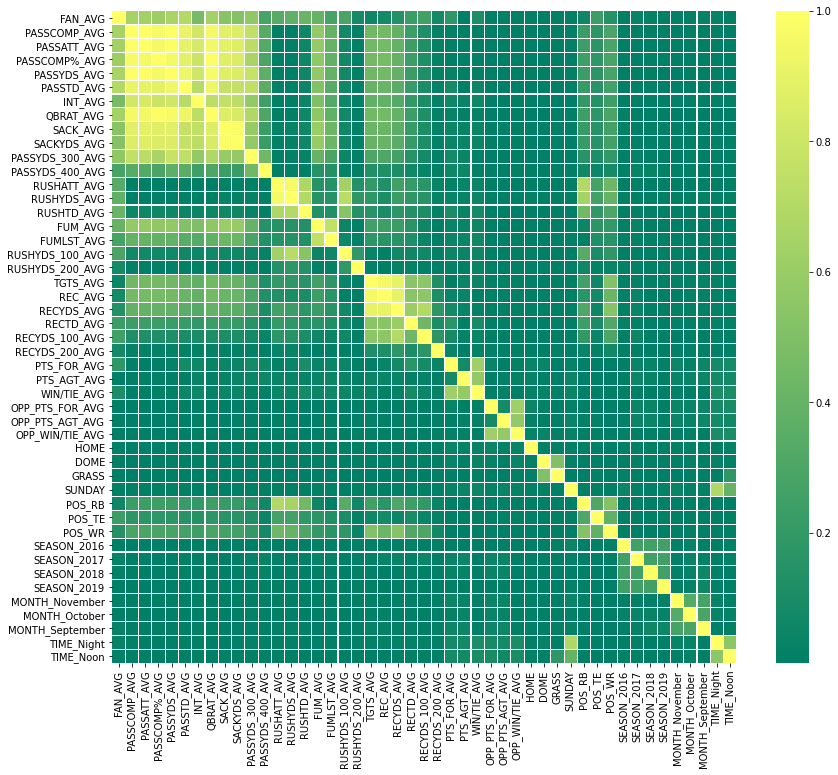

In [48]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(corr_matrix, linewidth=.1, cmap='summer', annot=False)

plt.show()

In [49]:
to_drop

['PASSATT_AVG',
 'PASSCOMP%_AVG',
 'PASSYDS_AVG',
 'PASSTD_AVG',
 'INT_AVG',
 'QBRAT_AVG',
 'SACK_AVG',
 'SACKYDS_AVG',
 'RUSHYDS_AVG',
 'REC_AVG',
 'RECYDS_AVG']

In [50]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

In [51]:
print(X_train.shape)
print(X_test.shape)

(16807, 36)
(5603, 36)


### Recursive Feature Elimination

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE 

For this approach, I will apply a RFECV (Recursive Feature Elimination with Cross-Validation) model with a SVR estimator using a "linear" kernel and reguralisation parameter of 1. We could apply greater cross-validation to the model to ensure we selected the optimal kernel and C levels but with the main aime to reduce features while minimising computing time and effort, I believe the above approach is adequate. 

The model identifies 19 features as being optimal number for our modelling.

In [52]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear", C=1, epsilon=0.1, gamma='scale')
rfecv = RFECV(estimator, step=1, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                    gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [53]:
cols = rfecv.get_support(indices=True)

X_rfecv_train = X_train.iloc[:,cols]
X_rfecv_test = X_test.iloc[:,cols]

#X_rfecv_train.head()
#X_rfecv_test.head()

#X_rfecv_train.columns

In [54]:
print(X_rfecv_train.shape)
print(X_rfecv_test.shape)

(16807, 19)
(5603, 19)


Optimal number of features : 19


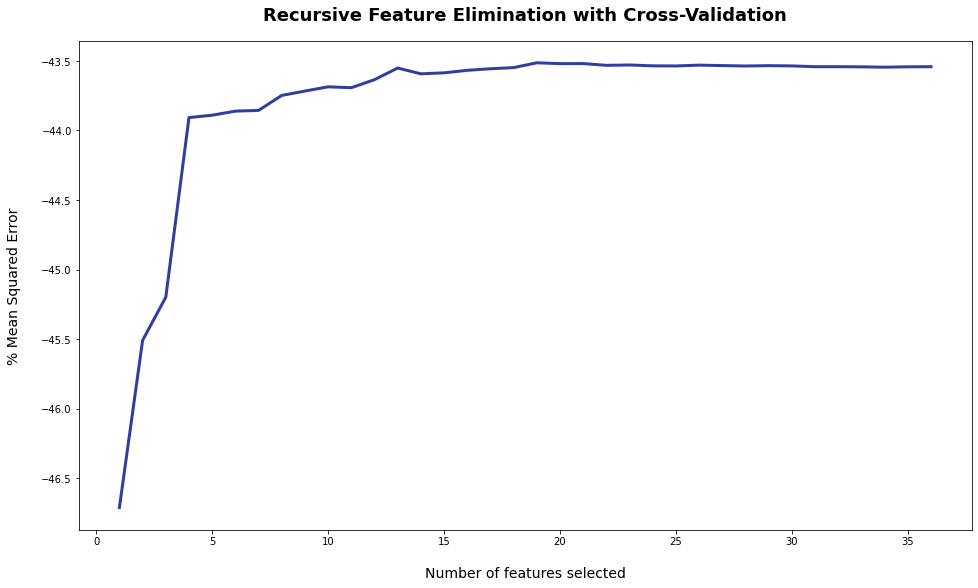

In [55]:
print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Mean Squared Error', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()



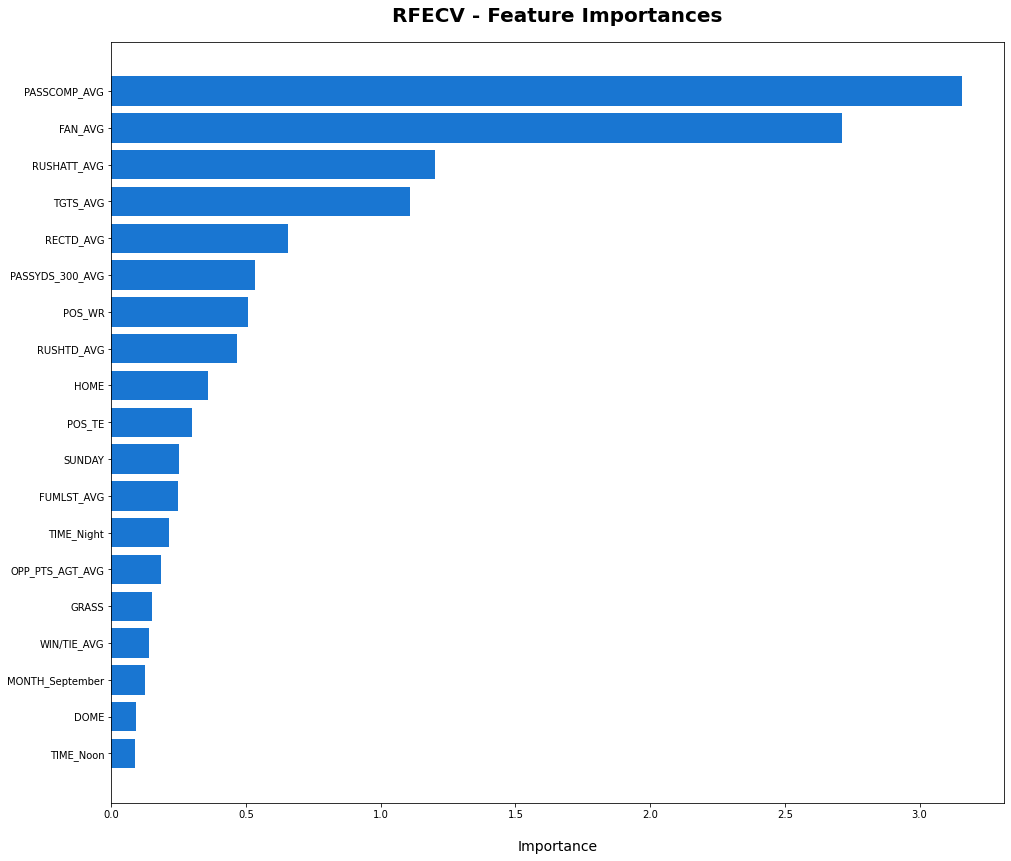

In [56]:
dset = pd.DataFrame()
dset['attr'] = X_rfecv_train.columns
dset['importance'] = np.absolute(rfecv.estimator_.coef_[0])

dset = dset.sort_values(by='importance', ascending=True)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [57]:
drop_col_rfecv = np.where(rfecv.support_ == False)[0]

In [58]:
print('Dropped columns are: ')
      
print(X_train.iloc[:,drop_col_rfecv].columns)

Dropped columns are: 
Index(['PASSYDS_400_AVG', 'FUM_AVG', 'RUSHYDS_100_AVG', 'RUSHYDS_200_AVG',
       'RECYDS_100_AVG', 'RECYDS_200_AVG', 'PTS_FOR_AVG', 'PTS_AGT_AVG',
       'OPP_PTS_FOR_AVG', 'OPP_WIN/TIE_AVG', 'POS_RB', 'SEASON_2016',
       'SEASON_2017', 'SEASON_2018', 'SEASON_2019', 'MONTH_November',
       'MONTH_October'],
      dtype='object')


In [59]:
#rfecv.support_
#rfecv.ranking_

In [60]:
#X_train = rfecv.transform(X_train)
#X_test = rfecv.transform(X_test)
#X_train = pd.DataFrame(X_train, columns=X_rfecv_train.columns)
#X_test = pd.DataFrame(X_test, columns=X_rfecv_test.columns)

In [61]:
X_train = X_rfecv_train
X_test = X_rfecv_test

In [62]:
print(X_train.shape)
print(X_test.shape)

(16807, 19)
(5603, 19)


### Final Features

In [63]:
for col in X_train.columns:
  print(col)

FAN_AVG
PASSCOMP_AVG
PASSYDS_300_AVG
RUSHATT_AVG
RUSHTD_AVG
FUMLST_AVG
TGTS_AVG
RECTD_AVG
WIN/TIE_AVG
OPP_PTS_AGT_AVG
HOME
DOME
GRASS
SUNDAY
POS_TE
POS_WR
MONTH_September
TIME_Night
TIME_Noon


## Output Files for Modelling

In [64]:
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')
#X_rfecv_train.to_csv('X_train_df.csv')